In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

In [2]:
jobid = 17999    # propagator averaging. Three point output is normalized by 1 / 2sqrt(2)
Lx, Lt = 16, 48

out_dir = './analysis_output/job' + str(jobid)
# Z, σ, mom_list, prop_list, cfgnum = analysis.load_data(out_dir)
Z, σ, k_list, prop_list, cfgnum = analysis.load_data(out_dir)
mom_list = np.array([[k[0] / Lx, k[1] / Lx, k[2] / Lx, k[3] / Lt] for k in k_list]) * (2 * np.pi)
if Z.shape == ():
    Z = Z.item()
    σ = σ.item()

# try David's normalization of dividing by an extra 12
# for x in Z:
#     Z[x] = Z[x] / (2*np.sqrt(2))
#     σ[x] = σ[x] / (2*np.sqrt(2))
#     Z[x] = Z[x] / 12
#     σ[x] = σ[x] / 12

In [3]:
# analysis.mom_list = mom_list
# analysis.mom_str_list = analysis.plist_to_string(mom_list)
analysis.mom_list = k_list
analysis.mom_str_list = analysis.plist_to_string(k_list)
Z_MSbar = analysis.to_MSbar(Z)

<IPython.core.display.Javascript object>


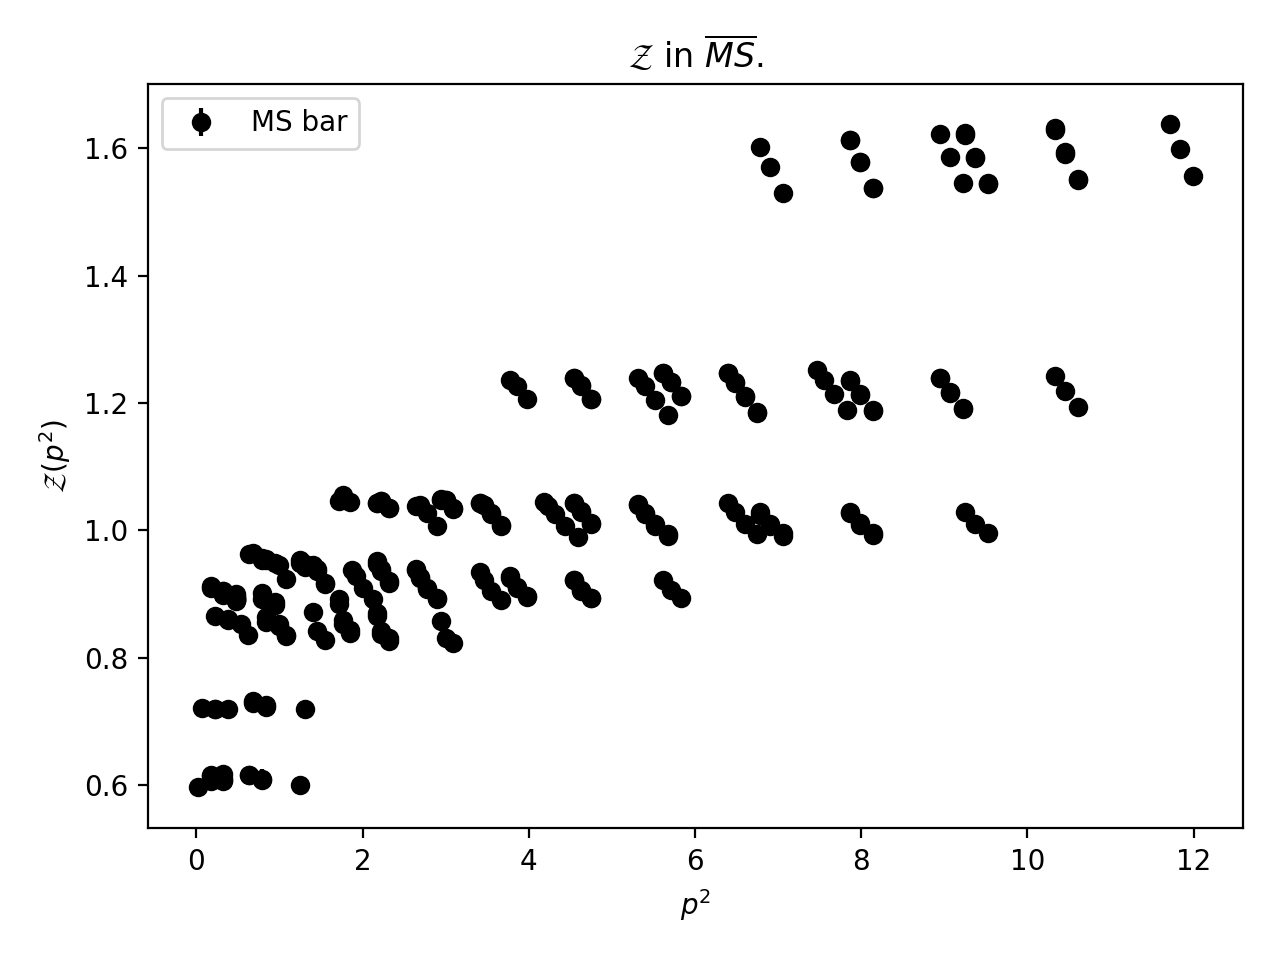

In [17]:
Z_list, σ_list = [], []
Z_MSbar_list = []
num_subplots = (len(prop_list) // 2 + 1, 2)
# f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 5))
f, ax = plt.subplots()
# ax = ax.flatten()
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
for idx in range(len(prop_list)):
    #Z_list.append(np.array([Z[analysis.plist_to_string(p)] for p in mom_list]))
    #σ_list.append(np.array([σ[analysis.plist_to_string(p)] for p in mom_list]))
    Z_list.append(np.array([Z[analysis.plist_to_string(p)] for p in k_list]))
    σ_list.append(np.array([σ[analysis.plist_to_string(p)] for p in k_list]))
    
    #ax.errorbar(p_squared, np.real(Z_list[idx]), yerr = np.abs(σ_list[idx]), fmt = 'o', c = 'b', label = 'RI-MOM')
    #Z_MSbar_list.append(np.array([Z_MSbar[analysis.plist_to_string(p)] for p in mom_list]))
    Z_MSbar_list.append(np.array([Z_MSbar[analysis.plist_to_string(p)] for p in k_list]))
    ax.errorbar(p_squared, np.real(Z_MSbar_list[idx]), yerr = np.abs(σ_list[idx]), fmt = 'o', c = 'k', label = 'MS bar')
    ax.set_xlabel('$p^2$')
    ax.legend()
    ax.set_ylabel('$\mathcal{Z}(p^2)$')
    ax.set_title('$\mathcal{Z}$ in $\overline{MS}$.')
plt.tight_layout()
# plt.title('Renormalization of quark operator')
plt.show()

In [5]:
# f = h5py.File('/Users/theoares/lqcd/Z.h5', 'w')
# x = np.vstack((Z_list[0], σ_list[0]))
# f['momenta'] = k_list
# f['data/Z'] = Z_list[0]
# f['data/sigma'] = σ_list[0]
# f.close()

In [16]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/17999/Z_inverse_MS.pdf')

In [ ]:
# # graph error as a function of distance from momentum source.
# num_subplots = (len(prop_list) // 2 + 1, 2)
# # num_subplots = (1, 2)
# f1, ax1 = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
# ax1 = ax1.flatten()
# for idx, mom in enumerate(prop_list):
#     rsquared = [analysis.square(np.array(p) - np.array(mom)) for p in mom_list]
#     ax1[idx].scatter(rsquared, σ_list[idx])
#     #for i, p in enumerate(mom_list):
#     #    ax1[idx].annotate(mom_list[i], (rsquared[i], σ_list[idx][i]))
#     ax1[idx].set_xlabel('$|p - p_{prop}|^2$')
#     ax1[idx].set_ylabel('Error')
#     ax1[idx].set_title('Propagator: ' + str(prop_list[idx]))
# plt.tight_layout()
# plt.show()

In [ ]:
# psub = subset of sink momenta to graph
# props_sub = subset of propagators to use (number of graphs to show)
# label = if True, will label each point with its momenta
def graph_subset(ksub, psub, props_sub, ms = True, label = False):
    num_subplots = (int(np.ceil(len(props_sub) / 2)), 2)
    #f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
    f, ax = plt.subplots()
    #ax = ax.flatten()
    p_squared_sub = np.array([np.abs(analysis.square(p)) for p in psub])
    #for idx in range(len(props_sub)):
    #Zsub = np.array([Z[idx][analysis.plist_to_string(p)] for p in psub])
    #σsub = np.array([σ[idx][analysis.plist_to_string(p)] for p in psub])
    if ms:
        Zsub = np.array([Z_MSbar[analysis.plist_to_string(p)] for p in psub])
    else:
        Zsub = np.array([Z[analysis.plist_to_string(p)] for p in psub])
    σsub = np.array([σ[analysis.plist_to_string(p)] for p in psub])
    ax.errorbar(p_squared_sub, np.abs(Zsub), yerr = np.abs(σsub), fmt = 'o')
    if label:
        for i, p in enumerate(p_squared_sub):
            ax.annotate(psub[i], (p, np.abs(Zsub[i])))
    ax.set_xlabel('$p^2$')
    ax.set_ylabel('$\mathcal{Z}(p^2)$')
    ax.set_title('Subset of momenta')
    plt.tight_layout()
    plt.show()
def graph_subset_error(psub, props_sub, label = False):
    num_subplots = (int(np.ceil(len(props_sub) / 2)), 2)
    f, ax = plt.subplots(num_subplots[0], num_subplots[1], figsize = (10, 10))
    ax = ax.flatten()
    p_squared_sub = np.array([np.abs(analysis.square(p)) for p in psub])
    for idx, mom in enumerate(props_sub):
        rsquaredsub = [analysis.square(np.array(p) - np.array(mom)) for p in psub]
        σsub = np.array([σ[idx][analysis.plist_to_string(p)] for p in psub])
        ax[idx].scatter(rsquaredsub, σsub)
        if label:
            for i, r in enumerate(rsquaredsub):
                ax[idx].annotate(psub[i], (r, σsub[i]))
        ax[idx].set_xlabel('$|p - p_{prop}|^2$')
        ax[idx].set_ylabel('Error')
        ax[idx].set_title('Prop momentum = ' + str(prop_list[idx]))
    plt.tight_layout()
    plt.show()

In [ ]:
# np.savetxt('/Users/theoares/lqcd/npr_momfrac/analysis_output/psub_2_17999.txt', psub, delimiter = ',')

In [ ]:
# psub = [p for p in mom_list if p[3] == 2]
# psub = [p for p in mom_list if p[0] == p[1] and p[1] == p[2] and p[2] == p[3]]
# psub = [[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4], [5, 5, 5, 5]]
ksub = [k for k in k_list if k[0] == k[1] and k[1] == k[2]]
psub = [p for p in mom_list if p[0] == p[1] and p[1] == p[2]]
# psub = analysis.cylinder(mom_list, 2)
# psub = []
# for i in range(1, 4 + 1):
#     for j in range(2, 8 + 1, 2):
#         if j + 1 >= i and not (i == 8 and j == 10):
#             psub.append([i, i, i, j])
print(psub)

props_sub = prop_list
# props_sub = prop_mom_list[:2]

graph_subset(psub, props_sub, ms = True, label = True)

In [ ]:
# plt.savefig('/Users/theoares/lqcd/npr_momfrac/analysis_output/Plots/17999/20_avg_pt_srcs_diag.pdf')

## Fit data

In [23]:
from scipy.optimize import curve_fit
from analysis import square

# adjust f to adjust curve fit functions. Assumes x is ptwid
# def f(x, Z_cont, c1, c2, c3, c4, c5):
#     return Z_cont + c1 * (x[2] - x[3]) + c2 * square(x) + c3 * np.sum(x ** 4) / square(x) \
#         + c4 * square(x) * np.log(square(x)) + c5 / square(x)
def f(x, Z_cont, c1, c2):
    return Z_cont + c1 * (np.sum(x ** 4) / square(x)) + c2 * np.sum(x ** 4)

def tildep(p):
    Lx, Lt = 16, 48
    L = [Lx, Lx, Lx, Lt]
    return np.array([np.sin(2 * np.pi * p[i] / L[i]) for i in range(4)])
def fourth(p):
    return np.sum(p ** 4)
# def Z_lat(mom_list, Z_cont, c1, c2, c3, c4, c5):
#     results = []
#     for p in mom_list:
#         ptwid = tildep(p)
#         results.append( f(ptwid, Z_cont, c1, c2, c3, c4, c5) )
#     return np.array(results)
def Z_lat(mom_list, Z_cont, c1, c2):
    results = []
    for p in mom_list:
        ptwid = tildep(p)
        results.append( f(ptwid, Z_cont, c1, c2) )
    return np.array(results)

In [24]:
C, cov = curve_fit(Z_lat, mom_list, np.real(Z_MSbar_list[0]), sigma = np.real(σ_list[0]))
print('Continuum Renormalization coefficient: ' + str(C[0]))
print('Fit parameters c_i: ' + str(C[1:]))

Continuum Renormalization coefficient: 0.8500038017717589
Fit parameters c_i: [0.51941962 0.48395356]


<IPython.core.display.Javascript object>


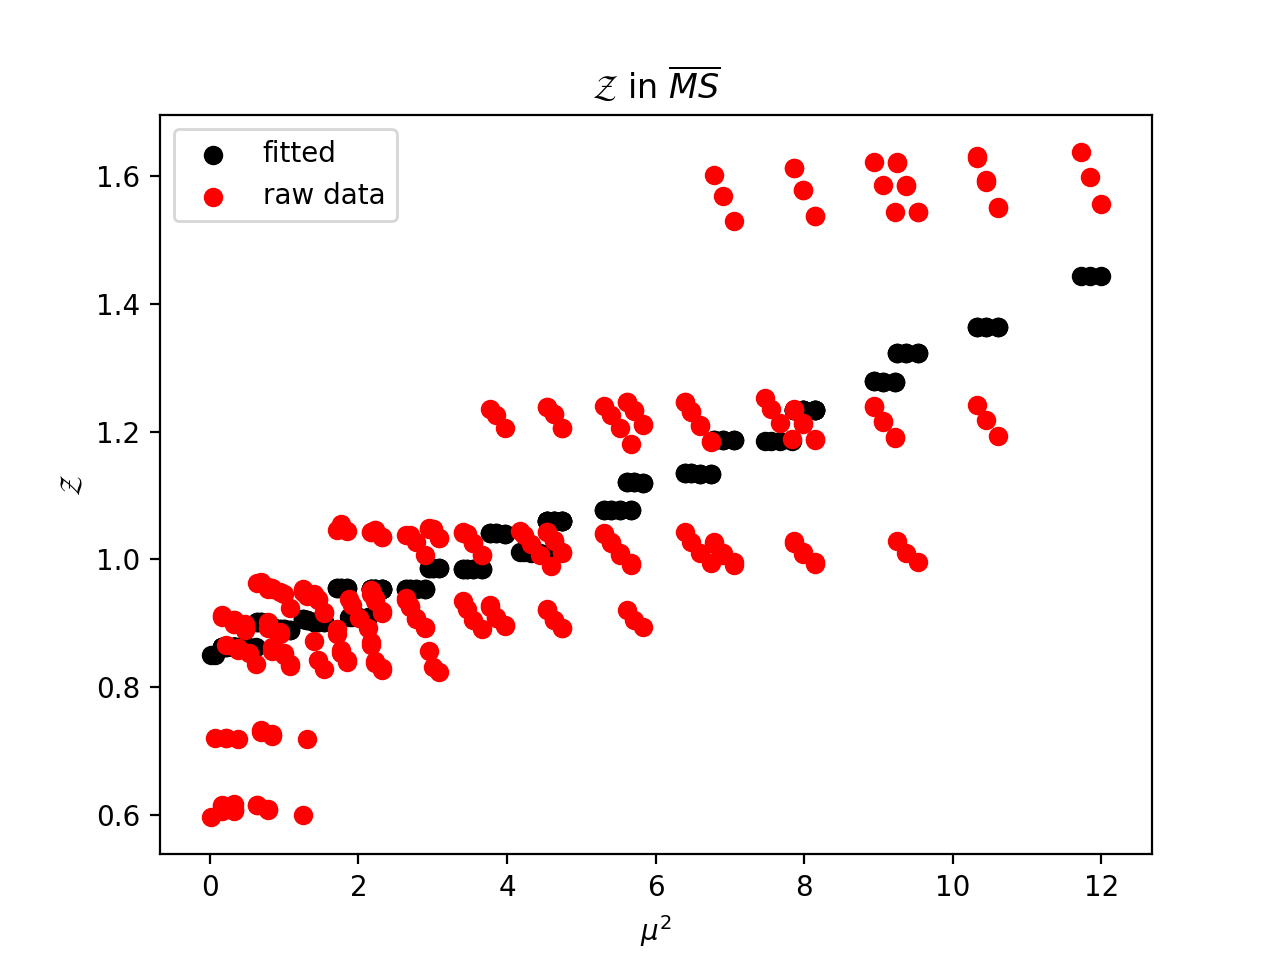

In [26]:
fig, ax = plt.subplots()
# ax.scatter([square(p) for p in mom_list], [f(tildep(p), C[0], C[1], C[2], C[3], C[4], C[5]) for p in mom_list], c = 'k', label = 'fitted')
ax.scatter([square(p) for p in mom_list], [f(tildep(p), C[0], C[1], C[2]) for p in mom_list], c = 'k', label = 'fitted')
ax.scatter([square(p) for p in mom_list], Z_MSbar_list, c = 'r', label = 'raw data')
ax.legend()
ax.set_title('$\mathcal{Z}$ in $\overline{MS}$')
ax.set_xlabel('$\mu^2$')
ax.set_ylabel('$\mathcal{Z}$')
plt.show()

In [ ]:
# Subtract artifacts off